In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
tweet_data = pd.read_csv("Prabowo_All2.csv", delimiter='\t', header=None, names=['data'])
tweet_data = tweet_data['data'].str.split(';', expand=True)
tweet_data.columns = ['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
                      'retweet_count', 'favorite_count', 'lang', 'user_id_str',
                      'conversation_id_str', 'username', 'tweet_url']

# Display basic information about the dataset
print(tweet_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           5021 non-null   object
 1   id_str               5018 non-null   object
 2   full_text            5018 non-null   object
 3   quote_count          5017 non-null   object
 4   reply_count          5017 non-null   object
 5   retweet_count        5017 non-null   object
 6   favorite_count       5017 non-null   object
 7   lang                 5017 non-null   object
 8   user_id_str          5017 non-null   object
 9   conversation_id_str  5017 non-null   object
 10  username             5016 non-null   object
 11  tweet_url            5016 non-null   object
dtypes: object(12)
memory usage: 470.8+ KB
None


In [3]:
tweet_data.shape

(5021, 12)

In [4]:
tweet_data.describe

<bound method NDFrame.describe of                           created_at    id_str  \
0                         created_at    id_str   
1     Mon Oct 30 23:24:45 +0000 2023  1,72E+18   
2     Mon Oct 30 14:34:00 +0000 2023  1,72E+18   
3     Mon Oct 30 11:16:07 +0000 2023  1,72E+18   
4     Mon Oct 30 11:01:16 +0000 2023  1,72E+18   
...                              ...       ...   
5016  Thu Jan 02 05:54:00 +0000 2020  1,21E+18   
5017  Wed Jan 01 13:39:36 +0000 2020  1,21E+18   
5018  Wed Jan 01 09:17:04 +0000 2020  1,21E+18   
5019  Wed Jan 01 05:58:29 +0000 2020  1,21E+18   
5020  Wed Jan 01 05:33:52 +0000 2020  1,21E+18   

                                              full_text  quote_count  \
0                                             full_text  quote_count   
1     *Mantan Istri Prabowo dan keluarga besar Cenda...           22   
2     diviralkan agar Rakyat Indonesia tidak salah p...            5   
3     Terima kasih atas undangan jamuan makan siangn...          128   
4    

In [7]:
# Display the first few rows of the dataset
print(tweet_data.head())

                       created_at    id_str  \
0                      created_at    id_str   
1  Mon Oct 30 23:24:45 +0000 2023  1,72E+18   
2  Mon Oct 30 14:34:00 +0000 2023  1,72E+18   
3  Mon Oct 30 11:16:07 +0000 2023  1,72E+18   
4  Mon Oct 30 11:01:16 +0000 2023  1,72E+18   

                                           full_text  quote_count  \
0                                          full_text  quote_count   
1  *Mantan Istri Prabowo dan keluarga besar Cenda...           22   
2  diviralkan agar Rakyat Indonesia tidak salah p...            5   
3  Terima kasih atas undangan jamuan makan siangn...          128   
4  "Wamendes Urus Kemenangan Prabowo-Gibran  Bapa...          214   

   reply_count  retweet_count  favorite_count  lang  user_id_str  \
0  reply_count  retweet_count  favorite_count  lang  user_id_str   
1          125            419            1044    in     1,67E+18   
2            7            394             521    in     1,67E+18   
3          765           1852 

In [8]:
# Check for missing values
print(tweet_data.isnull().sum())

created_at             0
id_str                 3
full_text              3
quote_count            4
reply_count            4
retweet_count          4
favorite_count         4
lang                   4
user_id_str            4
conversation_id_str    4
username               5
tweet_url              5
dtype: int64


In [9]:
# Explore numerical features
numerical_features = ['quote_count', 'reply_count', 'retweet_count', 'favorite_count']
print(tweet_data[numerical_features].describe())

       quote_count reply_count retweet_count favorite_count
count         5017        5017          5017           5017
unique         373         804           941           2064
top              3          16            54            370
freq           193          61            39             15


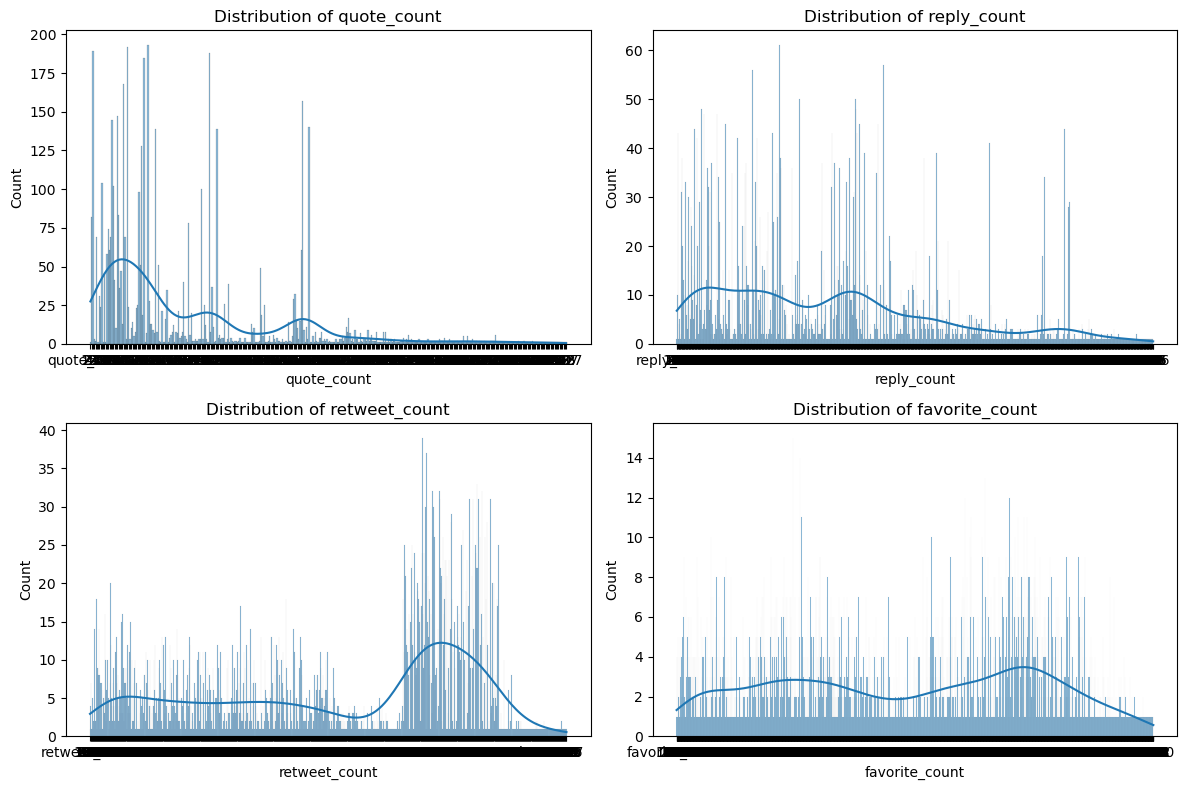

In [10]:
# Visualize the distribution of numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(tweet_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

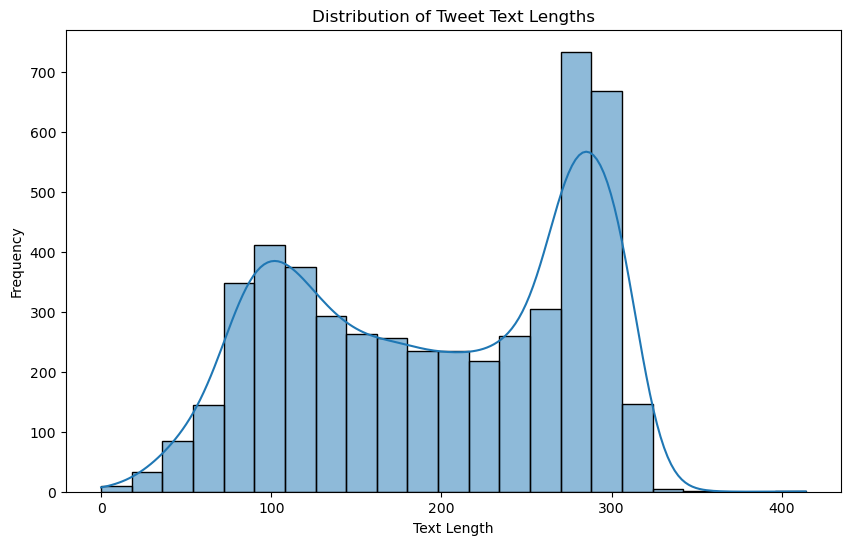

In [11]:
# Explore tweet text data
tweet_data['text_length'] = tweet_data['full_text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Visualize the distribution of tweet text lengths
plt.figure(figsize=(10, 6))
sns.histplot(tweet_data['text_length'], kde=True)
plt.title('Distribution of Tweet Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Explore survey data
survey_data = pd.read_excel('Electionforcode_Prabowo3.xlsx')

# Display basic information about the survey dataset
print(survey_data.info())

# Display the first few rows of the survey dataset
print(survey_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date Range            152 non-null    object 
 1   Prabowo               152 non-null    float64
 2   Polling firm          152 non-null    object 
 3   Numbers of Candidate  152 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.9+ KB
None
                         Date Range  Prabowo    Polling firm  \
0    9 January 2020-15 January 2020    0.225  Indo Barometer   
1   24 January 2020-30 January 2020    0.238   Cyrus Network   
2  1 February 2020-10 February 2020    0.173         PPI-PRC   
3  4 February 2020-10 February 2020    0.222       Indikator   
4  1 February 2020-14 February 2020    0.188          Median   

   Numbers of Candidate  
0                    11  
1                    11  
2                    11  
3                    11  
4       

<AxesSubplot:xlabel='Prabowo', ylabel='Density'>

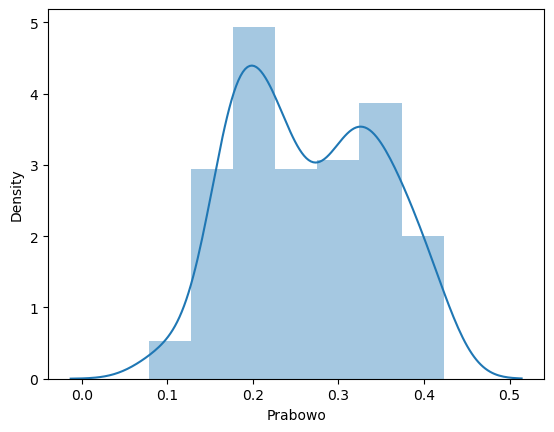

In [16]:
sns.distplot(survey_data['Prabowo'])

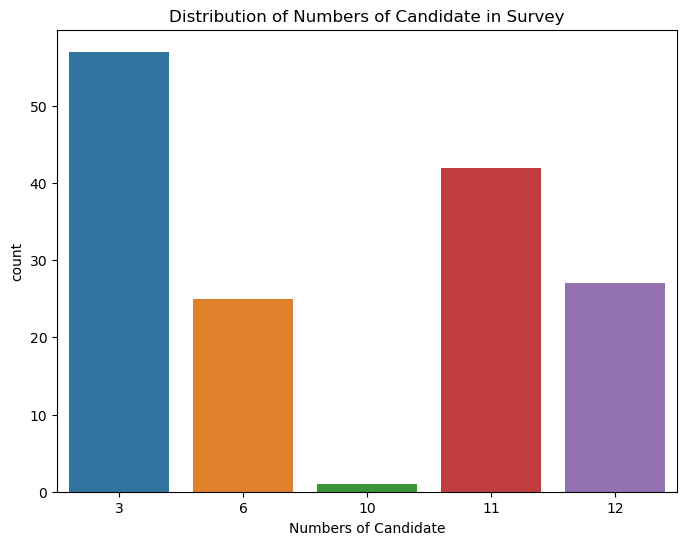

In [17]:
# Visualize the distribution of the 'Numbers of Candidate' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Numbers of Candidate', data=survey_data)
plt.title('Distribution of Numbers of Candidate in Survey')
plt.show()

In [18]:
# Explore file data
file_data = pd.read_excel('Phenomena2.xlsx')

# Display basic information about the file dataset
print(file_data.info())

# Display the first few rows of the file dataset
print(file_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  778 non-null    int64         
 1   Date        778 non-null    datetime64[ns]
 2   Phenomenon  778 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 18.4+ KB
None
   Unnamed: 0       Date                                         Phenomenon
0           0 2020-01-01   At least 66 people were killed after a massiv...
1           1 2020-01-06   Indonesia announced that it was mobilizing fi...
2           2 2020-01-10   The Indonesian Ministry of Forestry and Envir...
3           3 2020-01-14   Demonstrations took place in front of Jakarta...
4           4 2020-01-15   Fictional kingdoms and mythical movements reg...
